In [1]:
# Have to add id and secret first (for now)
import os
os.environ['SPOTIPY_CLIENT_ID'] = "<<YOUR_ID_HERE>>"
os.environ['SPOTIPY_CLIENT_SECRET'] = "<<YOUR_SECRET_HERE>>"

import warnings
warnings.simplefilter("ignore")

import plotnine
import qgrid
from tidyspotify import get_artist_audio_features
from plotnine import *

qgrid.set_grid_option("forceFitColumns", False)
plotnine.options.figure_size = (8, 4.8)
plotnine.theme_set(theme_grey())

## View Data


In [2]:
artist = get_artist_audio_features('the beatles')

qgrid.show_grid(artist.head())

QgridWidget(grid_options={'forceFitColumns': False, 'editable': True, 'maxVisibleRows': 15, 'filterable': True…

## Energy vs Valence

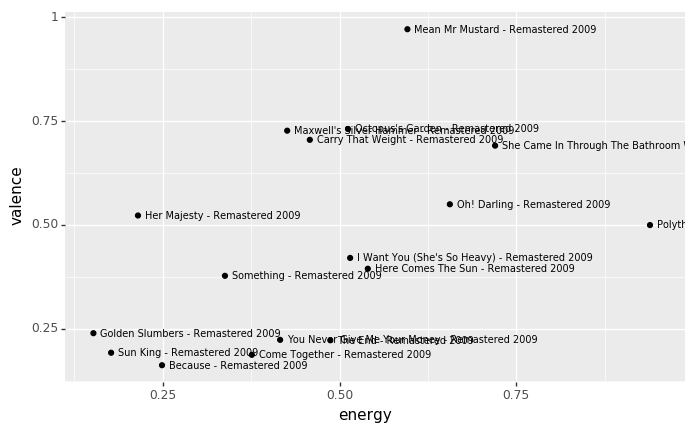

<ggplot: (-9223372036563150946)>

In [3]:
album = (artist
        .query("album_name == 'Abbey Road (Remastered)'")
        )
         
(ggplot(album, aes('energy', 'valence'))
        + geom_point()
        + geom_text(aes(label = 'track_name'), ha = 'left', size = 7, nudge_x = .01)
        )

## Barchart of characteristics for some songs

Below, we use the 6 most popular songs to show ratings for 4 kinds of sentiments (danceability, energy, speechiness, and valence).

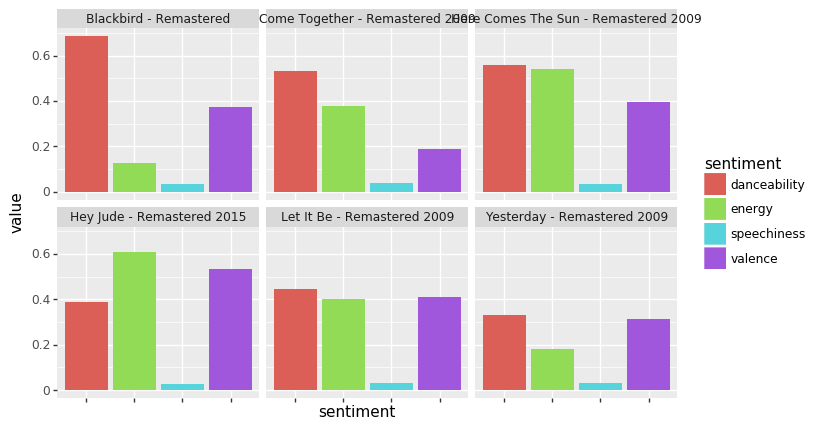

<ggplot: (-9223372036563416011)>

In [4]:
top6 = (artist
        .sort_values('track_popularity', ascending = False)
        .head(6)
        .loc[:,('track_name', 'danceability', 'energy', 'speechiness', 'valence')]
        .melt('track_name', var_name = 'sentiment')
        )

(ggplot(top6, aes('sentiment', 'value', fill = 'sentiment'))
        + geom_col()
        + facet_wrap('~track_name')
        + theme(axis_text_x = element_blank()))
